In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./archive/hr_employee_churn_data.csv')

In [4]:
data.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [6]:
data.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.shape

(14999, 10)

## Exploratory Data Analysis

In [8]:
data['Work_accident'].unique()

array([0, 1], dtype=int64)

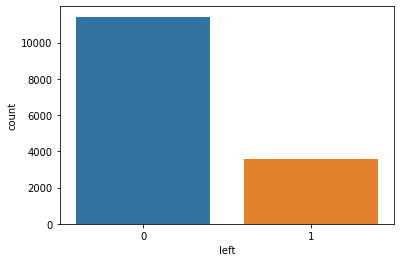

In [9]:
sns.countplot(x='left', data=data)
plt.show()

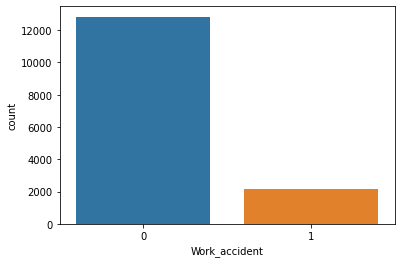

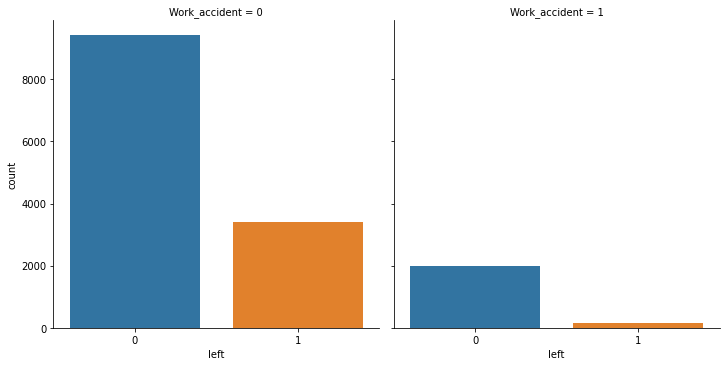

In [10]:
sns.countplot(x='Work_accident', data=data)
sns.catplot(x='left', col='Work_accident', kind='count', data=data)
plt.show()

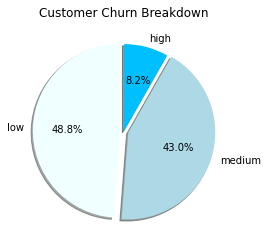

In [11]:
labels = data['salary'].value_counts(sort = True).index
sizes = data['salary'].value_counts(sort = True)
colors = ["azure","lightblue","deepskyblue"]
explode = (0.05,0.05,0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Customer Churn Breakdown')
plt.show()

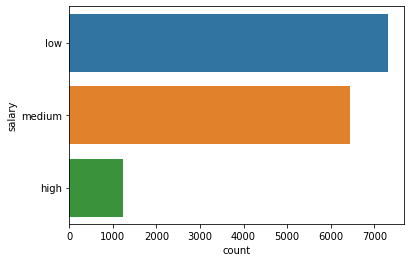

In [12]:
sns.countplot(y=data.salary, data=data)
plt.show()

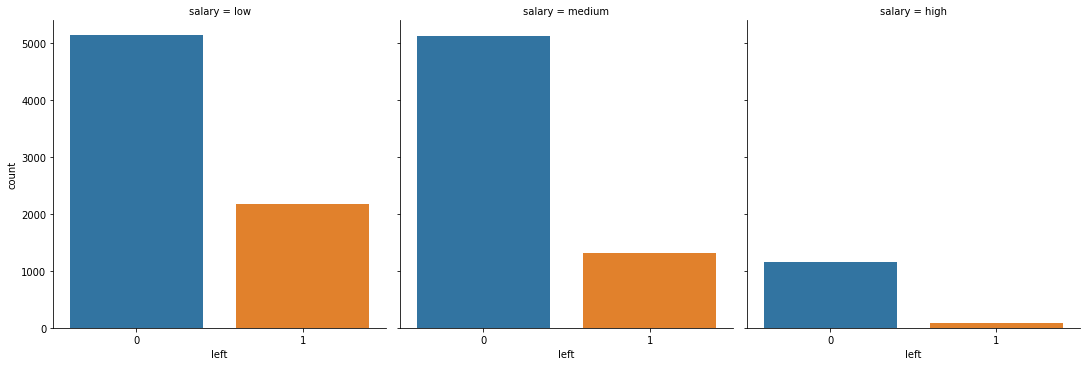

In [13]:
sns.catplot(x='left', col='salary', kind='count', data=data)

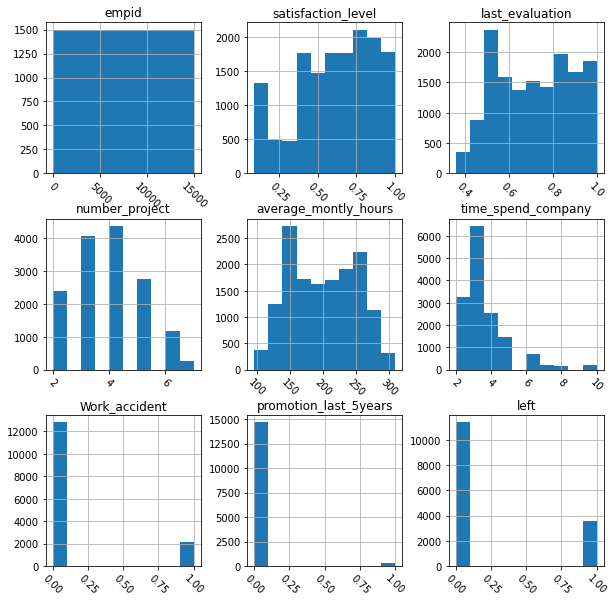

In [14]:
data.hist(figsize=(10,10), xrot=-45)
plt.show()

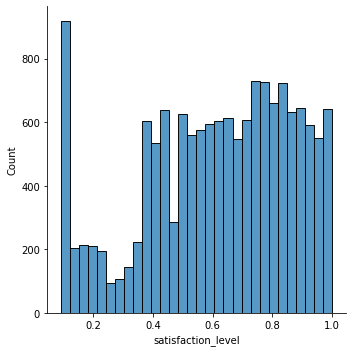

In [15]:
sns.displot(data['satisfaction_level'])

<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

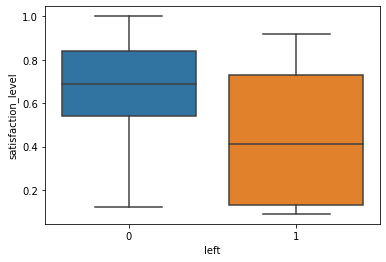

In [16]:
sns.boxplot(x="left", y="satisfaction_level", data=data)

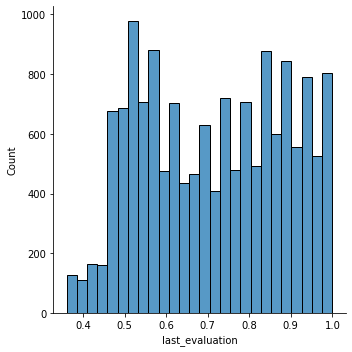

In [17]:
sns.displot(data['last_evaluation'])

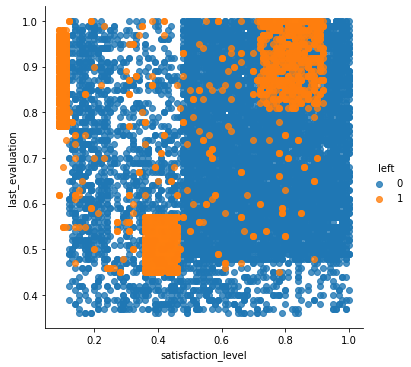

In [18]:
# Scatterplot of satisfacttion_level vs last_evalustion
sns.lmplot(x='satisfaction_level', y='last_evaluation', hue='left', data=data, fit_reg=False)

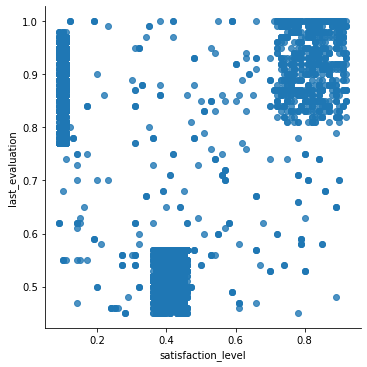

In [19]:
sns.lmplot(x='satisfaction_level', y='last_evaluation', data=data[data.left == 1], fit_reg=False)

Text(0.5, 1.0, 'Number of projects done by employee')

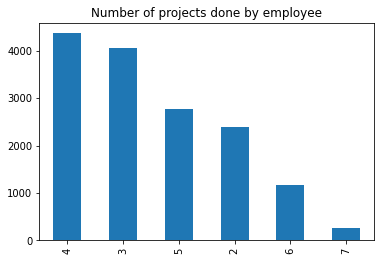

In [20]:
data['number_project'].value_counts().plot(kind='bar')
plt.title('Number of projects done by employee')

Text(0.5, 1.0, 'Average_Montly_Hours')

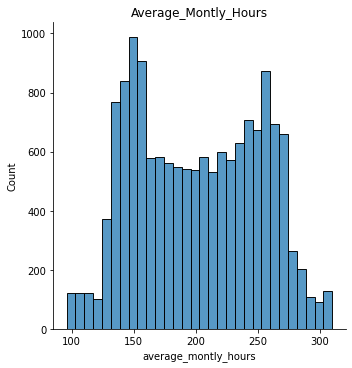

In [21]:
sns.displot(data['average_montly_hours'])
plt.title('Average_Montly_Hours')

Text(0.5, 1.0, 'Time_spend_company')

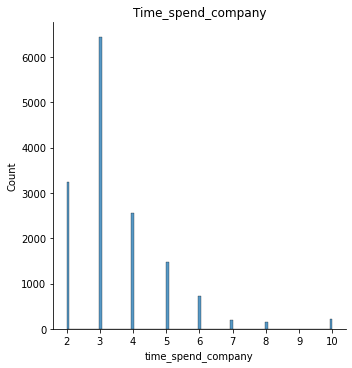

In [22]:
sns.displot(data['time_spend_company'])
plt.title('Time_spend_company')

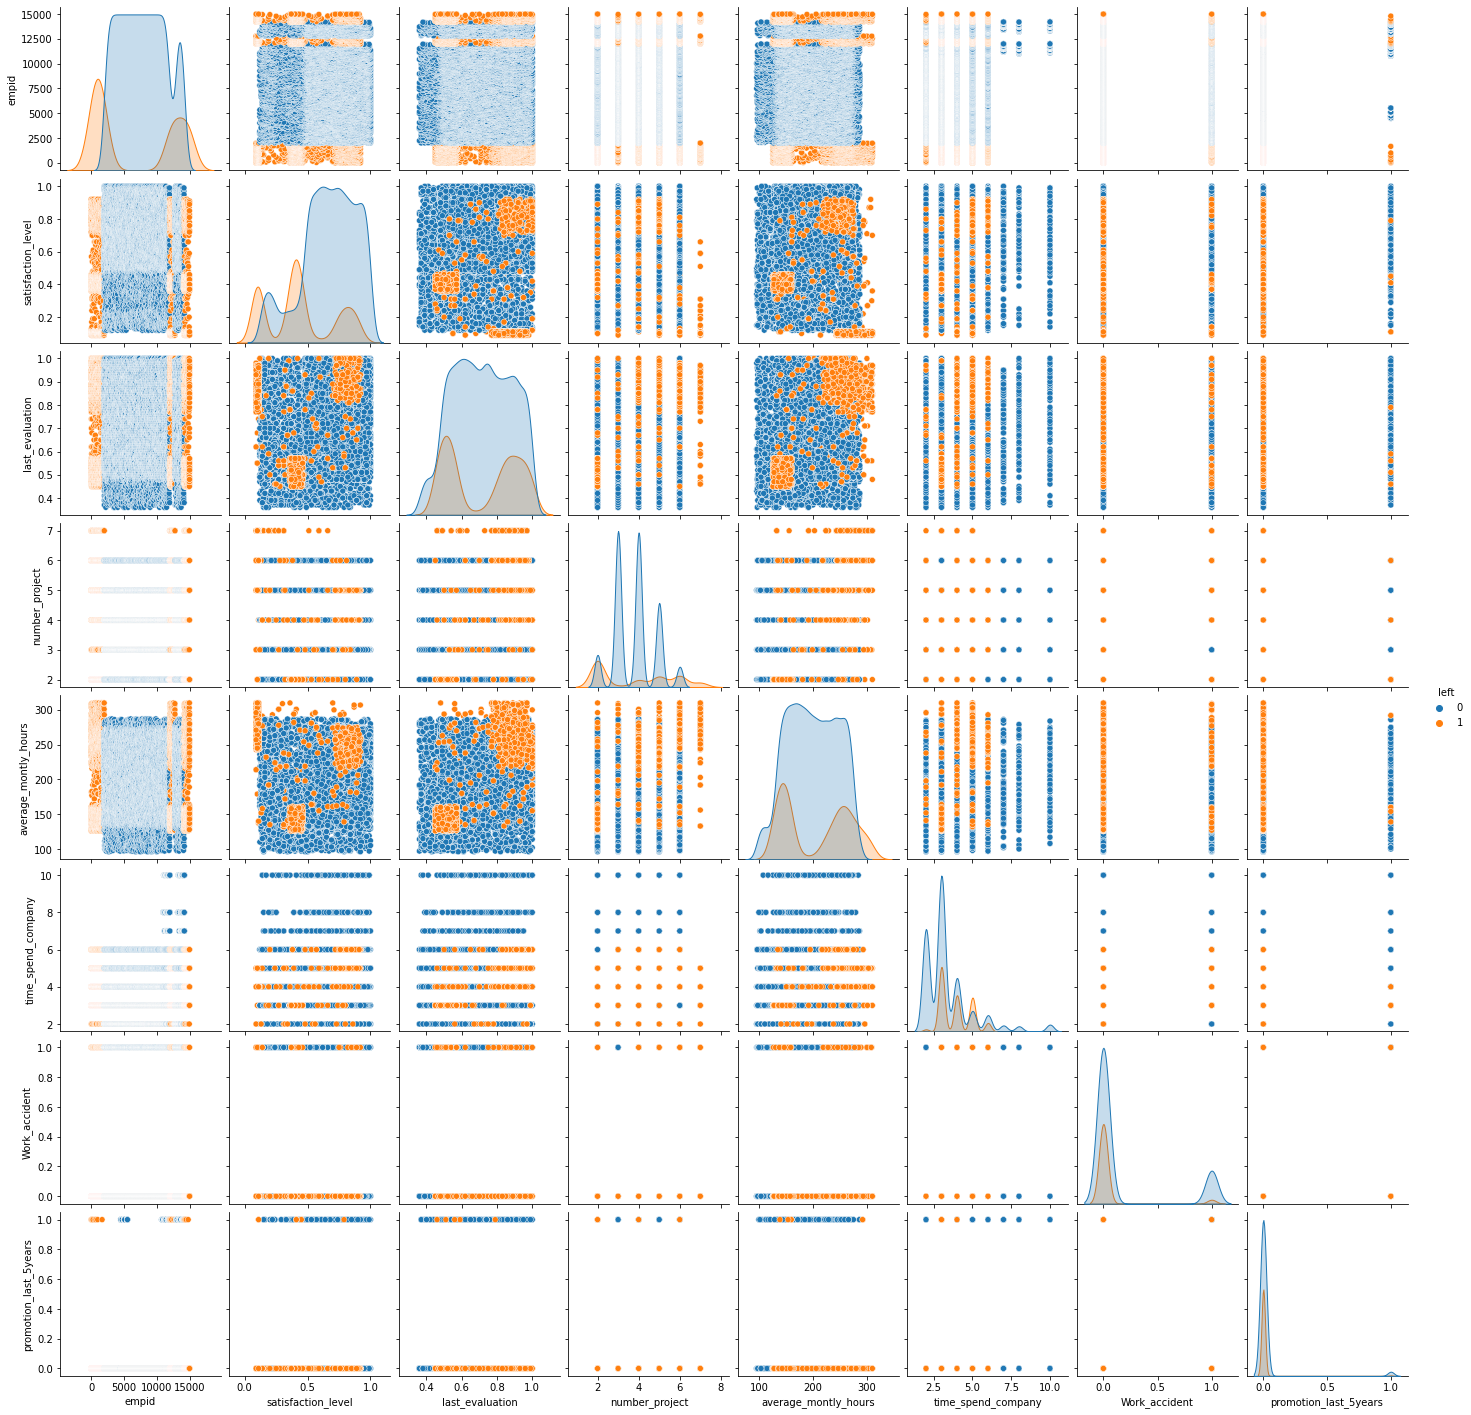

In [23]:
sns.pairplot(data, hue ='left')
plt.show()

<AxesSubplot:>

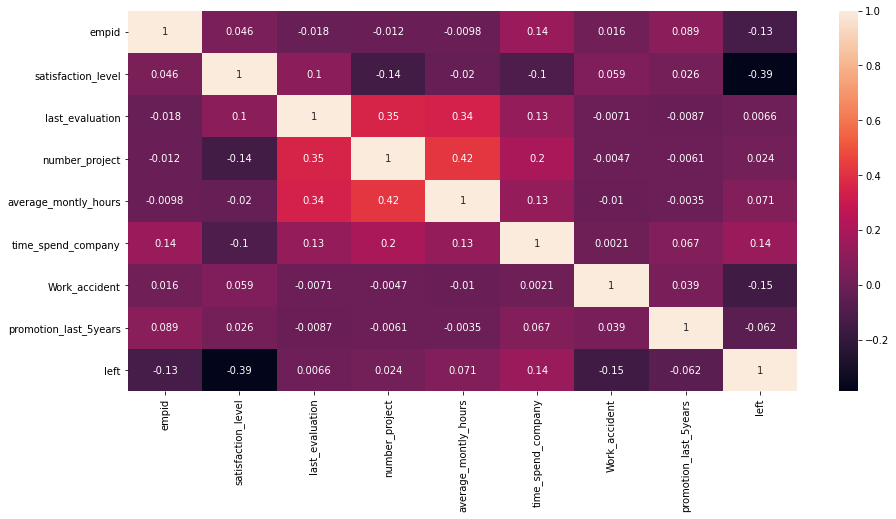

In [24]:
corr_mat = data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(corr_mat, annot=True)

## Feature Engineering

In [25]:
df = data.copy()

In [26]:
df.drop(['empid'], axis=1, inplace=True)

In [27]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [28]:
df.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(14997, 9)

In [31]:
# handle categorical value

In [32]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [33]:
salary_dummies = pd.get_dummies(df['salary'], drop_first=True)

In [34]:
salary_dummies.head()

,low,medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [35]:
df = pd.concat([df, salary_dummies], axis=1)

In [36]:
df.drop(['salary'], axis=1, inplace=True)

In [37]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


## Train Test Split

In [38]:
x = df.drop(['left'], axis=1)
y = df['left']

In [39]:
x.shape, y.shape

((14997, 9), (14997,))

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11997, 9), (3000, 9), (11997,), (3000,))

## ML Models

In [48]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [44]:
# 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Model 1 :- Logistic Regression

In [46]:
model_lr = LogisticRegression(solver='lbfgs',random_state=0)
model_lr.fit(x_train, y_train)

y_train_pred_lr = model_lr.predict(x_train)
y_test_pred_lr = model_lr.predict(x_test)


acc_lrTrain = accuracy_score(y_train_pred_lr, y_train) * 100
acc_lrTest = accuracy_score(y_test_pred_lr, y_test) * 100
print("Training Accuracy: ", acc_lrTrain)
print("Validation Accuracy: ", acc_lrTest)

print(confusion_matrix(y_test, y_test_pred_lr))
print(classification_report(y_test, y_test_pred_lr))

Training Accuracy:  79.4365257981162
Validation Accuracy:  79.26666666666667
[[2123  159]
 [ 463  255]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2282
           1       0.62      0.36      0.45       718

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



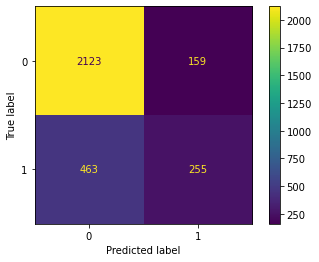

In [49]:
conf_matrix_LR = plot_confusion_matrix(model_lr, x_test, y_test)

## Model 2 :- Random Forest Classifier

In [50]:
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train, y_train)

y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

acc_rfTrain = accuracy_score(y_train_pred_rf, y_train) * 100
acc_rfTest = accuracy_score(y_test_pred_rf, y_test) * 100
print("Training Accuracy: ", acc_rfTrain)
print("Validation Accuracy: ", acc_rfTest)

print(classification_report(y_test, y_test_pred_rf))

Training Accuracy:  100.0
Validation Accuracy:  99.23333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2282
           1       0.99      0.97      0.98       718

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [51]:
print(confusion_matrix(y_test, y_test_pred_rf))

[[2277    5]
 [  18  700]]


## Model 3 :- Knn Classifier

In [52]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)

acc_knnTrain = accuracy_score(y_train_pred_knn, y_train) * 100
acc_knnTest = accuracy_score(y_test_pred_knn, y_test) * 100
print("Training Accuracy: ", acc_knnTrain)
print("Validation Accuracy: ", acc_knnTest)

print(classification_report(y_test, y_test_pred_knn))

Training Accuracy:  98.2912394765358
Validation Accuracy:  96.76666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2282
           1       0.92      0.94      0.93       718

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [53]:
print(confusion_matrix(y_test, y_test_pred_knn))

[[2225   57]
 [  40  678]]


## Model 4: SVC

In [54]:
model_svc = SVC(kernel = 'rbf', random_state=0)
model_svc.fit(X_train, y_train)

y_train_pred_svc = model_svc.predict(X_train)
y_test_pred_svc = model_svc.predict(X_test)

acc_svcTrain = accuracy_score(y_train_pred_svc, y_train) * 100
acc_svcTest = accuracy_score(y_test_pred_svc, y_test) * 100
print("Training Accuracy: ", acc_svcTrain)
print("Validation Accuracy: ", acc_svcTest)

print(classification_report(y_test, y_test_pred_svc))

Training Accuracy:  96.44911227806952
Validation Accuracy:  96.03333333333333
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2282
           1       0.93      0.90      0.92       718

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [55]:
print(confusion_matrix(y_test, y_test_pred_svc))

[[2235   47]
 [  72  646]]


## Model 5: XGBoost

In [56]:
model_xgb = XGBClassifier(random_state=0)
model_xgb.fit(X_train, y_train)

y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)

acc_xgboostTrain = accuracy_score(y_train_pred_svc, y_train) * 100
acc_xgboostTest = accuracy_score(y_test_pred_svc, y_test) * 100
print("Training Accuracy: ", acc_xgboostTrain)
print("Validation Accuracy: ", acc_xgboostTest)


print(classification_report(y_test, y_test_pred_xgb))

Training Accuracy:  96.44911227806952
Validation Accuracy:  96.03333333333333
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2282
           1       0.98      0.96      0.97       718

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [57]:
print(confusion_matrix(y_test, y_test_pred_xgb))

[[2271   11]
 [  30  688]]


### Comparing All Models

In [58]:
performance_df = pd.DataFrame({'Algorithm':['Logistic Regression','Random Forest Classifier', 'KNN Classifier', 'SVC', 'XGBoost Classifier'], 'Training Accuracy':[acc_lrTrain, acc_rfTrain, acc_knnTrain, acc_svcTrain, acc_xgboostTrain], 'Testing Accuracy':[acc_lrTest, acc_rfTest, acc_knnTest, acc_svcTest, acc_xgboostTest]}).set_index('Algorithm')

In [59]:
performance_df.sort_values('Testing Accuracy',ascending=False)

,Training Accuracy,Testing Accuracy
Algorithm,,
Random Forest Classifier,100.000000,99.233333
KNN Classifier,98.291239,96.766667
SVC,96.449112,96.033333
XGBoost Classifier,96.449112,96.033333
Logistic Regression,79.436526,79.266667


##### Based on the model scores, Random Forest Classifier seems to be the best model for this dataset.

In [60]:
# Export The models

In [61]:
# import joblib

In [62]:
# joblib.dump(model_rf,'Employee Retention_model_rf.pkl')

In [63]:
# joblib.dump(model_knn,'Employee Retention_model_knn.pkl')

In [64]:
# joblib.dump(model_svc,'Employee Retention_model_svc.pkl')

In [65]:
# joblib.dump(model_xgb,'Employee Retention_model_xgb.pkl')